# FoodVision101 👁🍕
This notebook is to bring foodvision into life, where we will need to classify about 101 food classes. The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes. We are trying to beat the [Food Vision Paper's](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf) average accuracy of 50.76% using Convolutional Neural Networks.

**Our Baseline is 50.76%**

🔑Note: we are using the preprocessed data from ZTM's Tenorflow course

We will start step by step:
1. Creating a model to diffrentiate between Pizza🍕 and Steak🥩

## Pizza🍕 and Steak🥩 model

In [ ]:
### Getting the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip" , "r")
zip_ref.extractall()
zip_ref.close()

--2023-08-18 11:34:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 142.251.175.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  20.8MB/s    in 6.2s    

2023-08-18 11:34:56 (16.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Becoming one with the data

In [ ]:
# Lising all the directories in the pizza_steak folder
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
## Walking through our directories
import os
for dirpath , dirnames , filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.


In [ ]:
# Getting the class names
import pathlib
import numpy as np

# Turinging our training path into a python path
data_dir = pathlib.Path("pizza_steak/train/")
# Getting the list of the filenames
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)

['pizza' 'steak']


In [ ]:
# Creating a view random image function
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir , target_class):
  # Setup directory we will view images from here
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder) , 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  return img

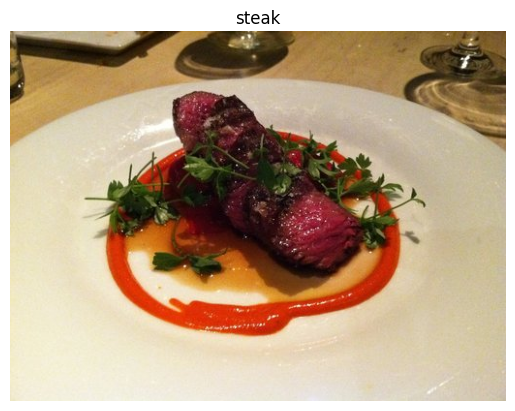

In [ ]:
# View a random steak image
steak_img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

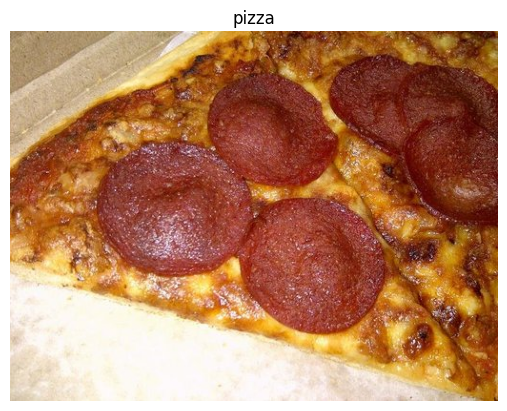

In [ ]:
# view a random pizza image
pizza_img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
# view image shapes
pizza_img.shape , steak_img.shape

((388, 512, 3), (382, 512, 3))

### TinyVGG architecture
This architecture will be our first model to diffrentiate between pizza and steak. It is from the https://poloclub.github.io/cnn-explainer/

In [ ]:
# Greating our image generators
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Getting the data from the directories

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               )

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size = 32,
                                             target_size = (224,224),
                                             class_mode = "binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Creating the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Conv2D , Flatten , Dense

EPOCHS = 5

model_1 = Sequential([
    Conv2D(10 , 3 , activation = "relu" , input_shape = (224,224,3)),
    Conv2D(10 , 3 , activation = "relu"),
    MaxPool2D(2),
    Conv2D(10 , 3 , activation = "relu"),
    Conv2D(10 , 3 , activation = "relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1 , activation = "sigmoid")
])

model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs = EPOCHS,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 137ms/step - loss: 0.6256 - accuracy: 0.5967 - val_loss: 0.6058 - val_accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4881 - accuracy: 0.7767 - val_loss: 0.3899 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4241 - accuracy: 0.8040 - val_loss: 0.3600 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 7s 145ms/step - loss: 0.3915 - accuracy: 0.8380 - val_loss: 0.3560 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3636 - accuracy: 0.8453 - val_loss: 0.3263 - val_accuracy: 0.8620


It seems that after only 5 epochs our model is doing quite good in binary classification as it is doing better than guessing ~50% accuracy

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

<Axes: >

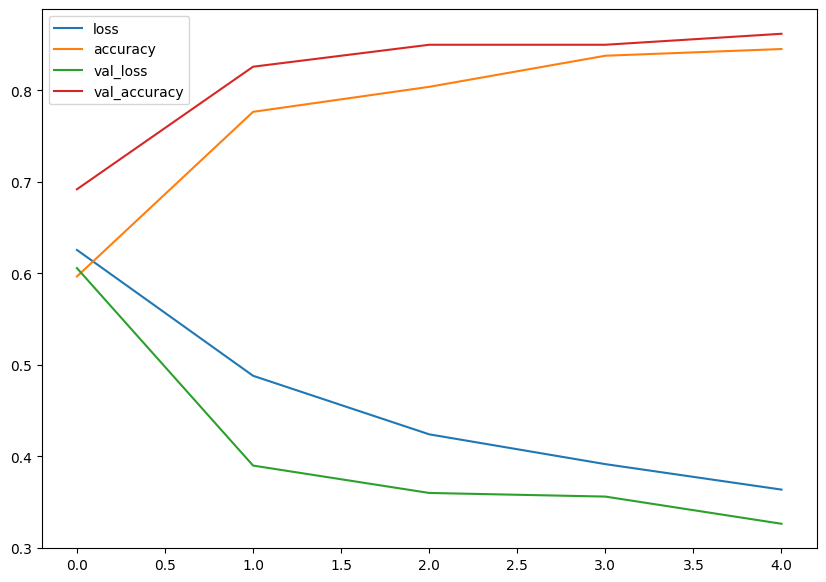

In [ ]:
### Evaluate our model
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize = (10,7))

It seems that our model is doing quite well on the training set as well as the test set

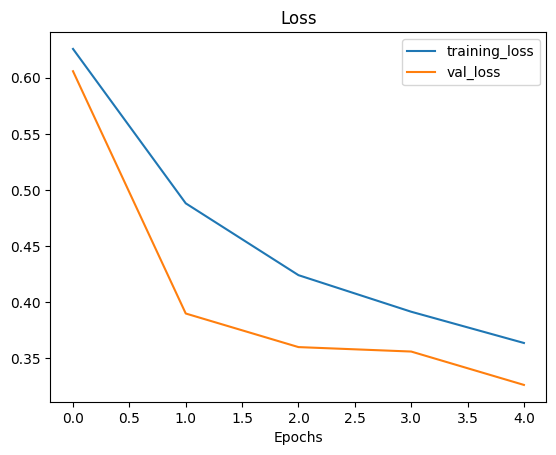

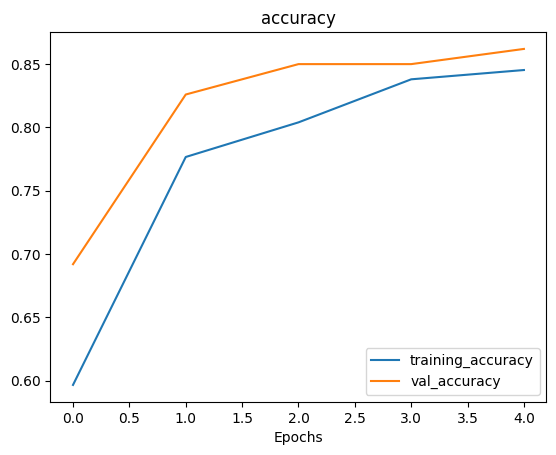

In [ ]:
# Plot the validation and training data sperately
import matplotlib.pyplot as plt
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure()
  plt.plot(epochs , loss , label = 'training_loss')
  plt.plot(epochs , val_loss , label = 'val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs , accuracy , label = 'training_accuracy')
  plt.plot(epochs , val_accuracy , label = 'val_accuracy')
  plt.title('accuracy')
  plt.xlabel('Epochs')
  plt.legend()

plot_loss_curves(history_1)

### Training a pizza steak model using data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)


In [ ]:
# Getting the data augmented images from the directories

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary')


Found 1500 images belonging to 2 classes.


In [ ]:
# Creeating the same model 1 but with data augmentation
model_2 = Sequential([
    Conv2D(10 , 3 , activation = "relu" , input_shape = (224,224,3)),
    Conv2D(10 , 3 , activation = "relu"),
    MaxPool2D(2),
    Conv2D(10 , 3 , activation = "relu"),
    Conv2D(10 , 3 , activation = "relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1 , activation = "sigmoid")
])

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data_augmented,
                        epochs = EPOCHS,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 475ms/step - loss: 0.6564 - accuracy: 0.5907 - val_loss: 0.5351 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 26s 553ms/step - loss: 0.5620 - accuracy: 0.7080 - val_loss: 0.4531 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 24s 496ms/step - loss: 0.5184 - accuracy: 0.7493 - val_loss: 0.4205 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 21s 447ms/step - loss: 0.4803 - accuracy: 0.7833 - val_loss: 0.3334 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 23s 480ms/step - loss: 0.4769 - accuracy: 0.7673 - val_loss: 0.3223 - val_accuracy: 0.8540


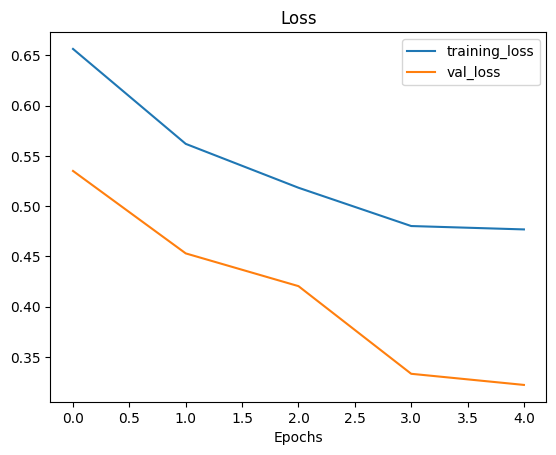

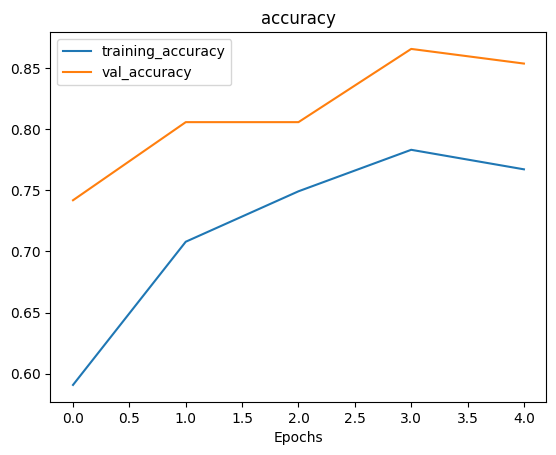

In [ ]:
plot_loss_curves(history_2)

It seems that our model with data augmentation is doing worse on the training set after 5 epochs. Maybe it is due to the fact that we didnot start overfitting in model 1 so data augmentation didnot help in improving performance in model 2

## Working with 10 different types of food `🍕🍎...🥩`

### Import and become one with the data

In [ ]:
import zipfile
# Dowload zip file of 10_food_classes images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip" , "r")
zip_ref.extractall()
zip_ref.close()

--2023-08-18 03:46:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 142.251.31.128, 142.251.18.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  41.3MB/s    in 13s     

2023-08-18 03:46:21 (38.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Walking through our directories
for dirpath , dirnames , filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [ ]:
# Setting up our new train & test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


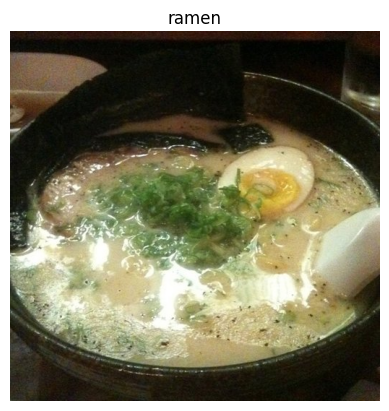

In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
# Creating our data generators and getting the data from the directoried
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Load data in from directories and turn it into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Creating our baseline for 10 classes of food
model_3 = Sequential([
    Conv2D(10 , 3 , activation = "relu" , input_shape = (224,224,3)),
    Conv2D(10 , 3 , activation = "relu"),
    MaxPool2D(2),
    Conv2D(10 , 3 , activation = "relu"),
    Conv2D(10 , 3 , activation = "relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10 , activation = "softmax")
])

model_3.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs = EPOCHS,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 34s 132ms/step - loss: 2.2540 - accuracy: 0.1503 - val_loss: 2.1874 - val_accuracy: 0.1924
Epoch 2/5
235/235 [==============================] - 32s 134ms/step - loss: 2.0610 - accuracy: 0.2692 - val_loss: 2.1310 - val_accuracy: 0.2508
Epoch 3/5
235/235 [==============================] - 31s 133ms/step - loss: 1.5899 - accuracy: 0.4503 - val_loss: 2.3607 - val_accuracy: 0.2284
Epoch 4/5
235/235 [==============================] - 30s 128ms/step - loss: 0.9269 - accuracy: 0.6904 - val_loss: 2.9919 - val_accuracy: 0.2248
Epoch 5/5
235/235 [==============================] - 29s 124ms/step - loss: 0.4423 - accuracy: 0.8607 - val_loss: 4.5219 - val_accuracy: 0.2132


In [ ]:
### Evaluating our baseline model for 10 classes of food
model_3.evaluate(test_data)

79/79 [==============================] - 11s 135ms/step - loss: 4.5219 - accuracy: 0.2132


[4.521906852722168, 0.21320000290870667]

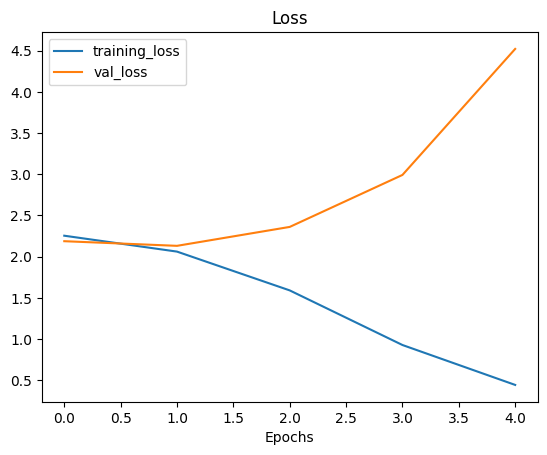

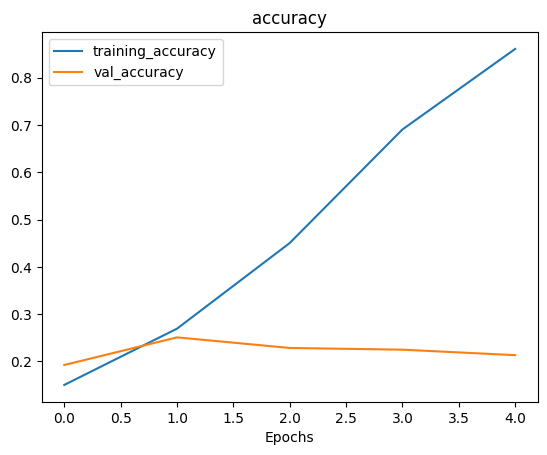

In [ ]:
plot_loss_curves(history_3)

It seems like our model is overfitting which means it is doing quite well in the training set but it is failing to generalize for the test set

Steps we can do:
1. get more data
2. simplify the model
3. Use data augmentation
4. Use transfer learning

In [ ]:
# Trying a simplified model
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_4.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 35s 140ms/step - loss: 2.2031 - accuracy: 0.2033 - val_loss: 2.0377 - val_accuracy: 0.2684
Epoch 2/5
235/235 [==============================] - 29s 122ms/step - loss: 1.8231 - accuracy: 0.3795 - val_loss: 1.9576 - val_accuracy: 0.3076
Epoch 3/5
235/235 [==============================] - 28s 119ms/step - loss: 1.4578 - accuracy: 0.5244 - val_loss: 2.0056 - val_accuracy: 0.3036
Epoch 4/5
235/235 [==============================] - 32s 134ms/step - loss: 0.9756 - accuracy: 0.6936 - val_loss: 2.2870 - val_accuracy: 0.2764
Epoch 5/5
235/235 [==============================] - 28s 121ms/step - loss: 0.5447 - accuracy: 0.8453 - val_loss: 2.8509 - val_accuracy: 0.2812


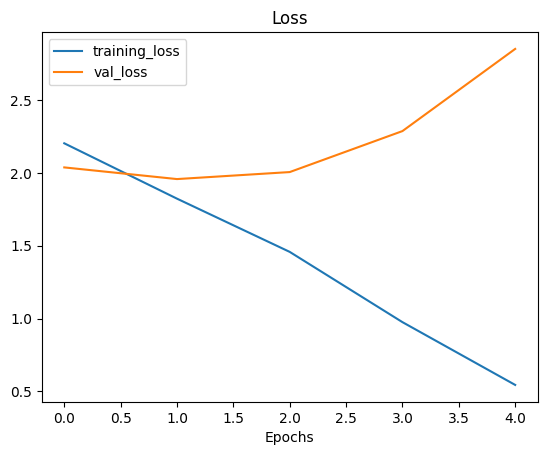

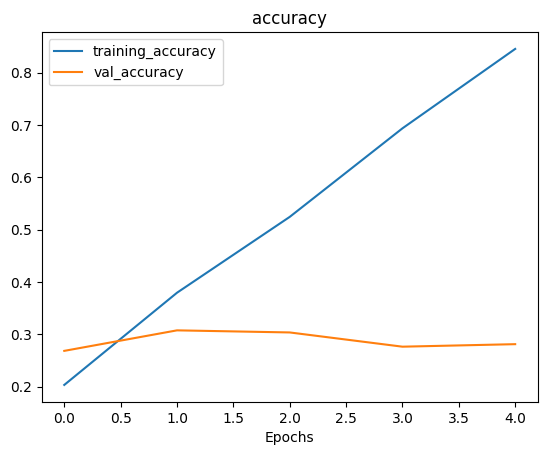

In [ ]:
plot_loss_curves(history_4)

It seems that our model is still overfitting even after simplifying it

#### Trying data augmentation

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [ ]:
# Using same model 4
model_5 = tf.keras.models.clone_model(model_4)
model_5.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data_augmented, # use augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 125s 524ms/step - loss: 2.2699 - accuracy: 0.1788 - val_loss: 2.0225 - val_accuracy: 0.2836
Epoch 2/5
235/235 [==============================] - 108s 459ms/step - loss: 2.0759 - accuracy: 0.2689 - val_loss: 1.9852 - val_accuracy: 0.3096
Epoch 3/5
235/235 [==============================] - 110s 470ms/step - loss: 2.0325 - accuracy: 0.2843 - val_loss: 1.9044 - val_accuracy: 0.3336
Epoch 4/5
235/235 [==============================] - 104s 443ms/step - loss: 1.9993 - accuracy: 0.3048 - val_loss: 1.8956 - val_accuracy: 0.3464
Epoch 5/5
235/235 [==============================] - 108s 461ms/step - loss: 1.9781 - accuracy: 0.3009 - val_loss: 1.8323 - val_accuracy: 0.3752


🔑 Our epoch takes a long time as data is being augmented on the fly, to improve performance we can add the data augmentation layer in the model

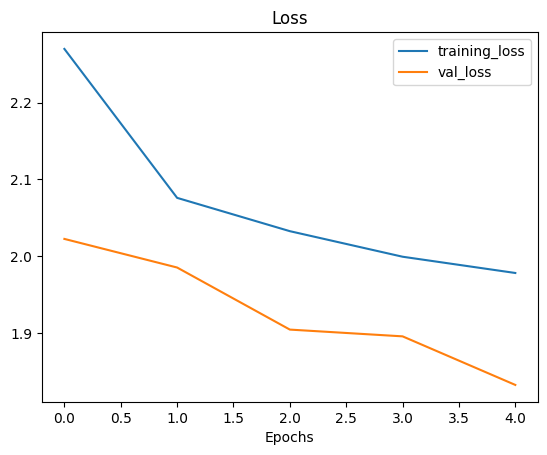

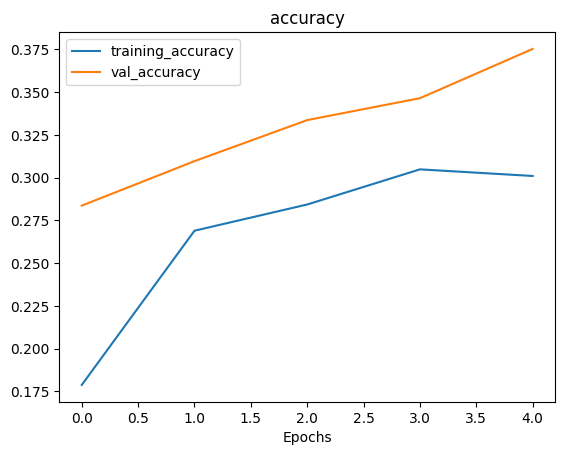

In [ ]:
# Check out our model's performance with augmented data
plot_loss_curves(history_5)

That's looking much bdtter , the loss curves are much closer to each other. Altough our model didn't perform as well on the augmented training set , it performed much better on the validation dataset

We could keep making other experiments with more layers , bigger layers and much more but let's try transfer learning!

### Transfer Learning
In this section we will be using the power of transfer learning to improve our models. We will be using ResnetV2 and EfficientNet to see which one is better for our task.

#### Experiment 1: Using 10% of our data

In [ ]:
# Get data (10% of labels)
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-08-18 11:37:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 64.233.170.128, 142.251.175.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  22.0MB/s    in 8.4s    

2023-08-18 11:37:42 (19.2 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
# Walk through 10 percent data
import os

for dirpath , dirnames , filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_10_percent.
There are 10 directories and 0 images in 10_food_classes_10_percent/train.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/ramen.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/chicken_curry.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/pizza.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/ice_cream.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/grilled_salmon.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/steak.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/chicken_wings.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/hamburger.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/sushi.
There are 0 directories and 75 images in 10_food_classes_10_percent/train/fried_rice.
There are

In [ ]:
# Loading our data from the directories
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size = IMAGE_SHAPE,
                                                          batch_size = BATCH_SIZE,
                                                          class_mode = "categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMAGE_SHAPE,
                                             batch_size = BATCH_SIZE,
                                             class_mode = "categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Create tensorboard callback
import datetime
def create_tensorboard_callback(dir_name , experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  return tensorboard_callback

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
# ResnetV2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
# Efficientnet v1 url
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
# funtion to get a model url in tensorflow hub and return to use a model ready to use

def create_model(model_url , num_classes = 10):
  feature_extraction_layer = hub.KerasLayer(model_url,
                                            trainable = False,
                                            name = 'feature_extraction_layer',
                                            input_shape = IMAGE_SHAPE + (3,))

  model = tf.keras.Sequential([
      feature_extraction_layer,
      layers.Dense(num_classes , activation = "softmax" , name = "output_layer")
  ])

  return model

In [ ]:
resnet_model = create_model(resnet_url , num_classes=train_data_10_percent.num_classes)

resnet_model.compile(loss = 'categorical_crossentropy',
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])


In [ ]:
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs = 5,
                                  steps_per_epoch = len(train_data_10_percent),
                                  validation_data = test_data,
                                  validation_steps = len(test_data),
                                  callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="resnet50V2")])

Epoch 1/5
24/24 [==============================] - 18s 571ms/step - loss: 1.9483 - accuracy: 0.3667 - val_loss: 1.2069 - val_accuracy: 0.6188
Epoch 2/5
24/24 [==============================] - 11s 453ms/step - loss: 0.8960 - accuracy: 0.7413 - val_loss: 0.8649 - val_accuracy: 0.7300
Epoch 3/5
24/24 [==============================] - 10s 443ms/step - loss: 0.6154 - accuracy: 0.8293 - val_loss: 0.7528 - val_accuracy: 0.7636
Epoch 4/5
24/24 [==============================] - 10s 444ms/step - loss: 0.4732 - accuracy: 0.8827 - val_loss: 0.6983 - val_accuracy: 0.7860
Epoch 5/5
24/24 [==============================] - 10s 442ms/step - loss: 0.3791 - accuracy: 0.9253 - val_loss: 0.6731 - val_accuracy: 0.7820


With transfer learning we were able to get ~92 % training accuracy and ~0.78% test accuracy with only 10% of our data!!

In [ ]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


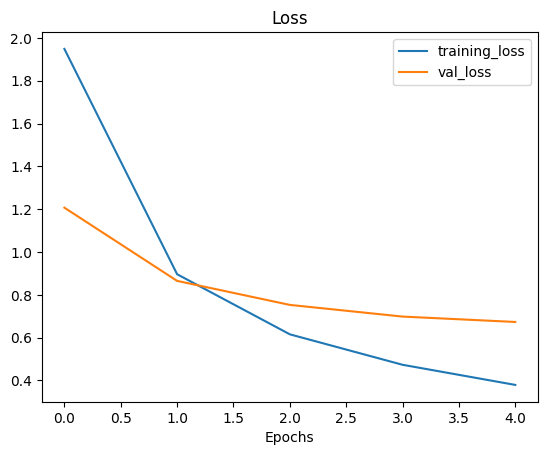

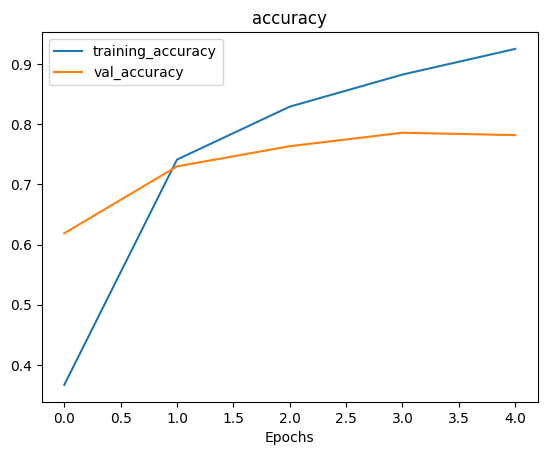

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
# Trying efficientnet
efficientnet_model = create_model(model_url=efficientnet_url,
                                  num_classes=train_data_10_percent.num_classes)

efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                                              epochs=5,
                                              steps_per_epoch=len(train_data_10_percent),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                     experiment_name="efficientnetB0")])

Epoch 1/5
24/24 [==============================] - 22s 491ms/step - loss: 1.8193 - accuracy: 0.4480 - val_loss: 1.2810 - val_accuracy: 0.7236
Epoch 2/5
24/24 [==============================] - 11s 459ms/step - loss: 1.0496 - accuracy: 0.7680 - val_loss: 0.8578 - val_accuracy: 0.8128
Epoch 3/5
24/24 [==============================] - 11s 457ms/step - loss: 0.7517 - accuracy: 0.8253 - val_loss: 0.6929 - val_accuracy: 0.8424
Epoch 4/5
24/24 [==============================] - 9s 391ms/step - loss: 0.5996 - accuracy: 0.8573 - val_loss: 0.6089 - val_accuracy: 0.8552
Epoch 5/5
24/24 [==============================] - 10s 415ms/step - loss: 0.5063 - accuracy: 0.8907 - val_loss: 0.5545 - val_accuracy: 0.8612


With efficientnet as our backbone we are doing on the test set even better than the resnet experiment

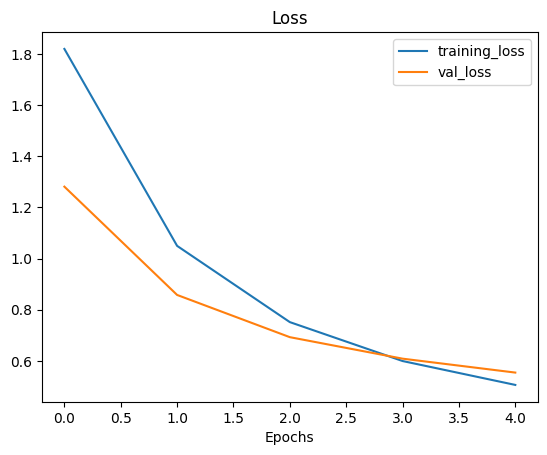

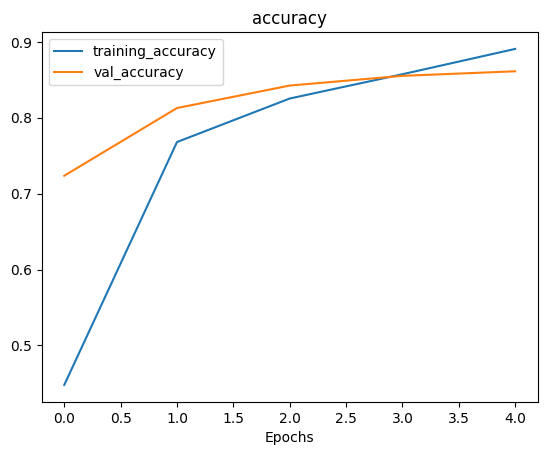

In [ ]:
plot_loss_curves(efficientnet_history)

It seems that the efficientnet as a backbone model is doing quite well and if we train for more epochs we can get better results

In [ ]:
efficientnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
# Trying fitting an efficientnet model for longer
# Trying efficientnet
efficientnet_model2 = create_model(model_url=efficientnet_url,
                                  num_classes=train_data_10_percent.num_classes)

efficientnet_model2.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

efficientnet_history2 = efficientnet_model2.fit(train_data_10_percent,
                                                epochs=20,
                                                steps_per_epoch=len(train_data_10_percent),
                                                validation_data=test_data,
                                                validation_steps=len(test_data),
                                                callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                     experiment_name="efficientnetB0_2")])

Epoch 1/20
24/24 [==============================] - 23s 577ms/step - loss: 1.8370 - accuracy: 0.4427 - val_loss: 1.3003 - val_accuracy: 0.7208
Epoch 2/20
24/24 [==============================] - 12s 535ms/step - loss: 1.0438 - accuracy: 0.7813 - val_loss: 0.8642 - val_accuracy: 0.8076
Epoch 3/20
24/24 [==============================] - 12s 535ms/step - loss: 0.7427 - accuracy: 0.8320 - val_loss: 0.6972 - val_accuracy: 0.8404
Epoch 4/20
24/24 [==============================] - 12s 533ms/step - loss: 0.5987 - accuracy: 0.8613 - val_loss: 0.6135 - val_accuracy: 0.8492
Epoch 5/20
24/24 [==============================] - 10s 423ms/step - loss: 0.5049 - accuracy: 0.8840 - val_loss: 0.5579 - val_accuracy: 0.8564
Epoch 6/20
24/24 [==============================] - 9s 386ms/step - loss: 0.4394 - accuracy: 0.9000 - val_loss: 0.5202 - val_accuracy: 0.8648
Epoch 7/20
24/24 [==============================] - 11s 468ms/step - loss: 0.3888 - accuracy: 0.9147 - val_loss: 0.4987 - val_accuracy: 0.8624


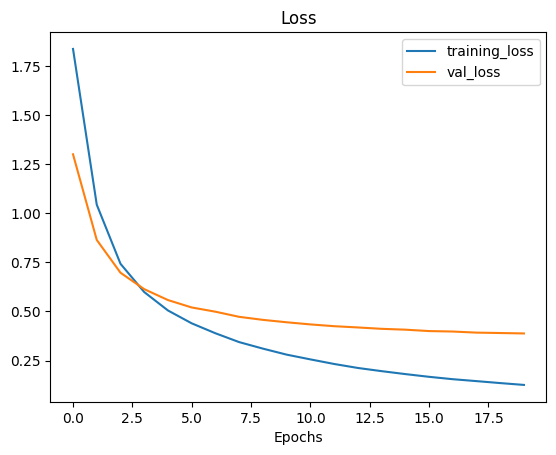

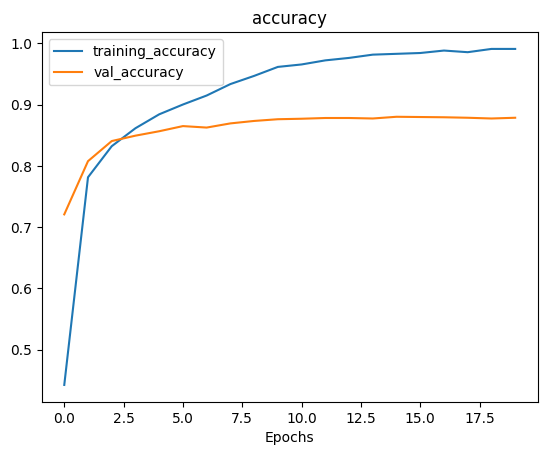

In [ ]:
plot_loss_curves(efficientnet_history2)

It seems that our model is overfitting so increasing the number of epochs didnot help that much so what we can do next
1. get more data
2. use different architecture
3. use data augmentation

#### Before that lets try comparing our models using tensorboard


In [ ]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot


Tensorboard link of all the previous experimets: https://tensorboard.dev/experiment/V0l8ZYjVQ12BjoxZmDvNJA/

### Running a series of transfer learning experiments

In [ ]:
# Getting our helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-08-18 12:45:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-18 12:45:49 (81.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Getting our data and unzipping it
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-08-18 12:46:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.128, 74.125.141.128, 173.194.210.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   148MB/s    in 1.1s    

2023-08-18 12:46:12 (148 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/trai

In [ ]:
# Training and Test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
# Creating our data inputs using image dataset from directory
import tensorflow as tf

IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

🔑 Note: the batch sie is none due to it only being used during model training , none can be considered as a placeholder waiting to be filled with batch_size from the `image_dataset_from_directory()`

Advantages of image_dataset_from_directory():
1. have a lot of usedful methods and attributes like class_names
2. more efficient

In [ ]:
# Check out the class names
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

#### Model 0:

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3) , name = "input_layer")

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_6 = tf.keras.Model(inputs, outputs)

model_6.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_6 = model_6.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data_10_percent,
                        validation_steps=int(0.25 * len(test_data_10_percent)),
                        callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

24274472/24274472 [==============================] - 0s 0us/step
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20230818-125612
Epoch 1/5
24/24 [==============================] - 25s 280ms/step - loss: 1.8421 - accuracy: 0.4240 - val_loss: 1.2989 - val_accuracy: 0.7171
Epoch 2/5
24/24 [==============================] - 5s 178ms/step - loss: 1.1329 - accuracy: 0.7493 - val_loss: 0.8806 - val_accuracy: 0.8109
Epoch 3/5
24/24 [==============================] - 7s 290ms/step - loss: 0.8352 - accuracy: 0.8280 - val_loss: 0.6818 - val_accuracy: 0.8635
Epoch 4/5
24/24 [==============================] - 5s 180ms/step - loss: 0.7000 - accuracy: 0.8453 - val_loss: 0.6101 - val_accuracy: 0.8553
Epoch 5/5
24/24 [==============================] - 5s 192ms/step - loss: 0.6040 - accuracy: 0.8493 - val_loss: 0.5422 - val_accuracy: 0.8734


The usage of global average pooling:

* It offers a lot of advatages:
  1. Dimensionality Reduction
  2. Translation Invariance
  3. Regularization
  4. Memory Efficieny

* It can be used instead of flatten however each have there advantages

Both the `GlobalAveragePooling2D` layer and the `Flatten` layer are used for dimensionality reduction and transitioning from convolutional layers to fully connected layers in a neural network. However, they achieve this reduction in slightly different ways:

1. **GlobalAveragePooling2D Layer**:
   - Computes the average value of each feature map over its entire spatial dimensions.
   - Preserves the channel-wise information, but reduces spatial dimensions to a single value per channel.
   - Helps maintain the information about the presence or absence of different features across the entire image.
   - Often considered less prone to overfitting due to its regularization effect.
   - Can lead to more compact and memory-efficient models.

2. **Flatten Layer**:
   - Flattens the entire spatial structure of each feature map into a 1D array.
   - Preserves both channel-wise and spatial information, resulting in a linear array of values.
   - Can potentially introduce a large number of parameters if the spatial dimensions are large, increasing the risk of overfitting.
   - Does not inherently capture the global context of features present in different parts of the image.
   - Can be used when you want to preserve detailed spatial information and maintain a more complex representation.

In summary, the choice between using a `GlobalAveragePooling2D` layer and a `Flatten` layer depends on the goals of your model and the characteristics of your dataset:

- If you are aiming for a more memory-efficient and regularization-friendly architecture while sacrificing some spatial information, the `GlobalAveragePooling2D` layer might be a better choice.
- If you need to maintain detailed spatial information and have a higher tolerance for overfitting, the `Flatten` layer could be suitable.

In practice, both layers have their use cases, and the choice depends on the balance you want to strike between model complexity, memory efficiency, and the specific requirements of your task.

In [ ]:
model_6.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5,932,122
Trainable params: 12,810
Non-trainable params: 5,919,312
_________________________________________________________________


In [ ]:
# check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [ ]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   0           ['rescaling[0][0]']              
                                3)                                                

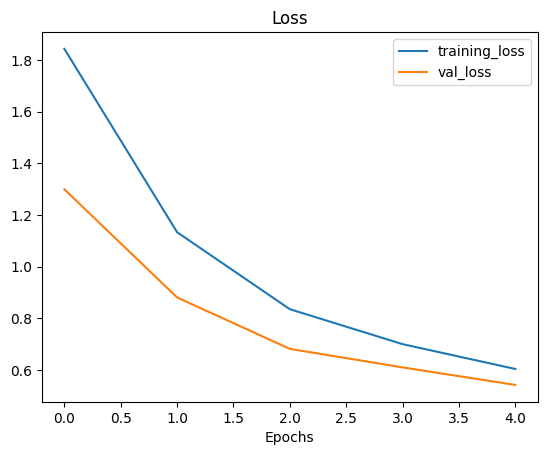

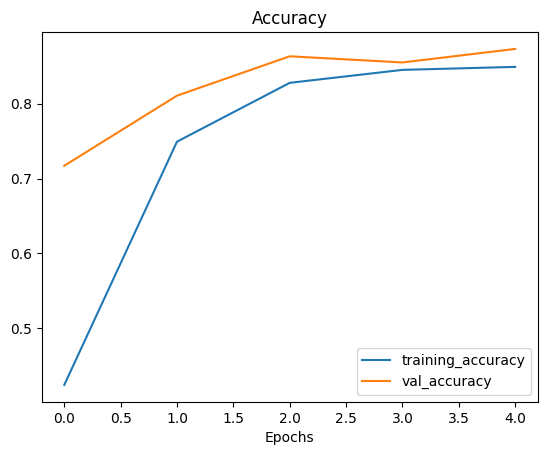

In [ ]:
plot_loss_curves(history_6)

#### Model 7
Use feature extraction transfer learning on 10% of the training data with data augmentation and save the results to a checkpoint.

In [ ]:
# Making our custom data augmentation layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
] , name = 'data_augmentation')

In [ ]:
# Creating our model
input_shape = (224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape , name = 'input_layer')
x = data_augmentation(inputs)
x = base_model(x)
x = layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)
outputs = layers.Dense(10 , activation = 'softmax' , name = 'output_layer')(x)
model_7 = tf.keras.Model(inputs,outputs)

model_7.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

In [ ]:
# Creating a modelcheckpoint callback
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights = True,
                                                         save_best_only = True,
                                                         save_freq = "epoch",
                                                         verbose = 1)

In [ ]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_7 = model_7.fit(train_data_10_percent,
                        epochs=initial_epochs,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                    checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230818-131914
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0630 - accuracy: 0.2987
Epoch 1: val_loss improved from inf to 1.55454, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 82s 3s/step - loss: 2.0630 - accuracy: 0.2987 - val_loss: 1.5545 - val_accuracy: 0.6102
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4546 - accuracy: 0.6307
Epoch 2: val_loss improved from 1.55454 to 1.12958, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 67s 3s/step - loss: 1.4546 - accuracy: 0.6307 - val_loss: 1.1296 - val_accuracy: 0.7204
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1675 - accuracy: 0.7067
Epoch 3: val_loss improved from 1.12958 to 0.92274, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 70s 3s/step - loss: 1.1675 - accuracy: 0.7067 - val_loss: 0.9227 - val_accuracy: 0.7599
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 1.0183 - accuracy: 0.7467
Epoch 4: val_loss improved from 0.92274 to 0.79528, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 69s 3s/step - loss: 1.0183 - accuracy: 0.7467 - val_loss: 0.7953 - val_accuracy: 0.7993
Epoch 5/5
24/24 [==============================] - ETA: 0s - loss: 0.8904 - accuracy: 0.7693
Epoch 5: val_loss improved from 0.79528 to 0.71448, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 77s 3s/step - loss: 0.8904 - accuracy: 0.7693 - val_loss: 0.7145 - val_accuracy: 0.8059


In [ ]:
result_7 = model_7.evaluate(test_data)

79/79 [==============================] - 7s 78ms/step - loss: 0.6930 - accuracy: 0.8108


It looks with data augmentation our model is doing worse than without after 5 epochs. That is because aur training data set is now harder

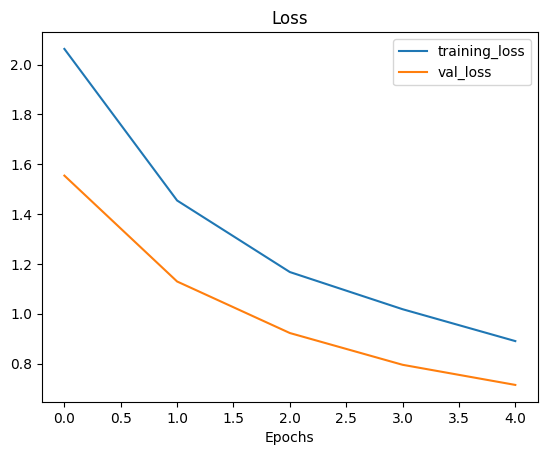

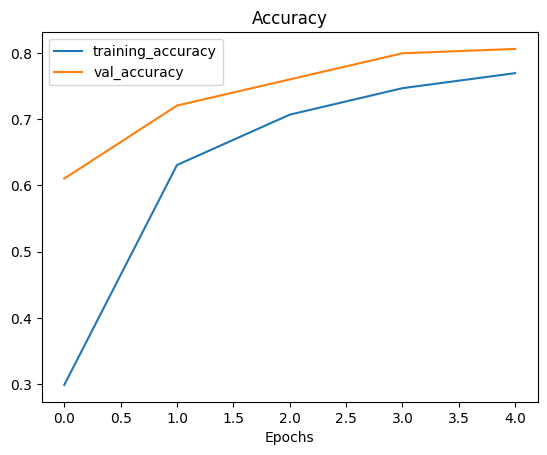

In [ ]:
plot_loss_curves(history_7)

It seems like our metrics are going in the correct direction

#### Model 8: Fine tuning on existing model on 10% of the data

In [ ]:
model_7.layers

In [ ]:
for layer_number, layer in enumerate(model_7.layers):
  print(f"Layer number: {layer_number} | Layer name: {layer.name} | Layer type: {layer} | Trainable? {layer.trainable}")


Layer number: 0 | Layer name: input_layer | Layer type: <keras.engine.input_layer.InputLayer object at 0x7c0510463b80> | Trainable? True
Layer number: 1 | Layer name: data_augmentation | Layer type: <keras.engine.sequential.Sequential object at 0x7c0509ebb460> | Trainable? True
Layer number: 2 | Layer name: efficientnetv2-b0 | Layer type: <keras.engine.functional.Functional object at 0x7c050431b190> | Trainable? False
Layer number: 3 | Layer name: global_average_pooling_layer | Layer type: <keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7c05104626e0> | Trainable? True
Layer number: 4 | Layer name: output_layer | Layer type: <keras.layers.core.dense.Dense object at 0x7c0504331cc0> | Trainable? True


So it seems layer 2 is not trainable so let's unfreeze the last couple layers to fine tune


In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_7.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
# Making the last 5 layers trainable
model_7.layers[2].trainable = True

for layer in model_7.layers[2].layers[:-10]:
  layer.trainable = False

model_7.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_7.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
print(len(model_7.trainable_variables)) # 10 variables of base model , 2 weights and biases of dense layer

12


In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_7_fine_tuned= model_7.fit(train_data_10_percent,
                                  epochs=fine_tune_epochs,
                                  validation_data=test_data,
                                  initial_epoch=history_7.epoch[-1], # start from previous last epoch
                                  validation_steps=int(0.25 * len(test_data)),
                                  callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]) # name experiment appropriately


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230818-133452
Epoch 5/10
24/24 [==============================] - 28s 541ms/step - loss: 1.0051 - accuracy: 0.7480 - val_loss: 0.7522 - val_accuracy: 0.8174
Epoch 6/10
24/24 [==============================] - 12s 499ms/step - loss: 0.9266 - accuracy: 0.7640 - val_loss: 0.6969 - val_accuracy: 0.8158
Epoch 7/10
24/24 [==============================] - 11s 452ms/step - loss: 0.8451 - accuracy: 0.7853 - val_loss: 0.6510 - val_accuracy: 0.8240
Epoch 8/10
24/24 [==============================] - 11s 457ms/step - loss: 0.7943 - accuracy: 0.8040 - val_loss: 0.6324 - val_accuracy: 0.8289
Epoch 9/10
24/24 [==============================] - 14s 572ms/step - loss: 0.7625 - accuracy: 0.8067 - val_loss: 0.5973 - val_accuracy: 0.8273
Epoch 10/10
24/24 [==============================] - 12s 466ms/step - loss: 0.7258 - accuracy: 0.8080 - val_loss: 0.5589 - val_accuracy: 0.8405


In [ ]:
model_7.evaluate(test_data)

79/79 [==============================] - 6s 69ms/step - loss: 0.5267 - accuracy: 0.8476


[0.5266952514648438, 0.847599983215332]

After fine tuning it seems like the model picked up extra 3% accuracy

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.29866665601730347, 0.6306666731834412, 0.7066666483879089, 0.746666669845581, 0.7693333625793457, 0.7480000257492065, 0.7639999985694885, 0.7853333353996277, 0.8040000200271606, 0.8066666722297668, 0.8080000281333923]


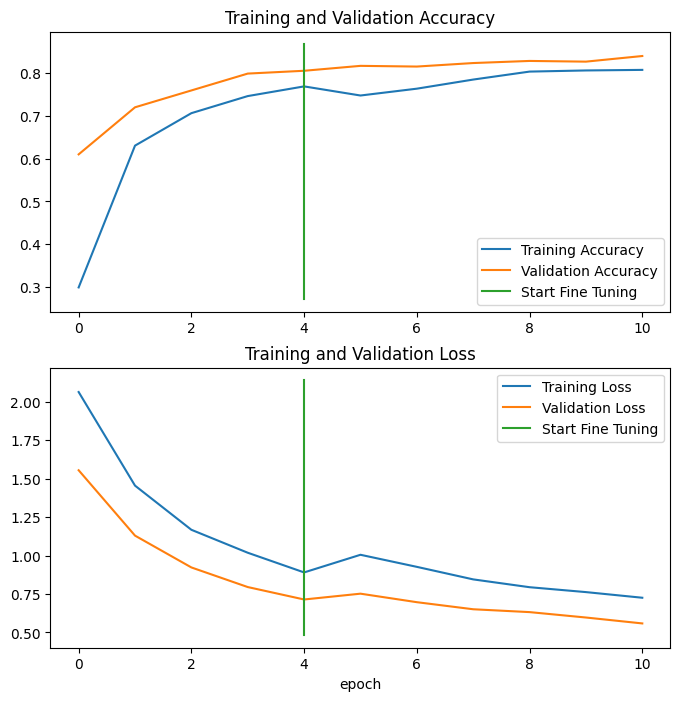

In [ ]:
compare_historys(history_7 , history_7_fine_tuned , 5)

#### Model 9: Fine tuning an existing model all of the data


In [ ]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2023-08-18 13:39:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.128, 173.194.212.128, 173.194.213.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  40.0MB/s    in 9.8s    

2023-08-18 13:40:03 (50.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [ ]:
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Creating our model
input_shape = (224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape , name = 'input_layer')
x = data_augmentation(inputs)
x = base_model(x)
x = layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)
outputs = layers.Dense(10 , activation = 'softmax' , name = 'output_layer')(x)
model_8 = tf.keras.Model(inputs,outputs)

model_8.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

In [ ]:
model_8.load_weights(checkpoint_path)

In [ ]:
model_8.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [ ]:
# Checking our base model to by not trainable
for layer_number, layer in enumerate(model_8.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


In [ ]:
#unfreezing the last 10 layers in our base model
model_8_base_model = model_8.layers[2]
model_8_base_model.trainable = True
for layer in model_8_base_model.layers[:-10]:
  layer.trainable = False

model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable in the base model
for layer_number, layer in enumerate(model_8_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
fine_tune_epochs = initial_epochs + 5

history_8 = model_8.fit(train_data_10_classes_full,
                        epochs=fine_tune_epochs,
                        initial_epoch=history_7.epoch[-1],
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])


Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20230818-134523
Epoch 5/10
235/235 [==============================] - 62s 204ms/step - loss: 0.9271 - accuracy: 0.7407 - val_loss: 0.4395 - val_accuracy: 0.8783
Epoch 6/10
235/235 [==============================] - 74s 313ms/step - loss: 0.7417 - accuracy: 0.7792 - val_loss: 0.3785 - val_accuracy: 0.8849
Epoch 7/10
235/235 [==============================] - 70s 293ms/step - loss: 0.6530 - accuracy: 0.8044 - val_loss: 0.3333 - val_accuracy: 0.8947
Epoch 8/10
235/235 [==============================] - 72s 297ms/step - loss: 0.5919 - accuracy: 0.8211 - val_loss: 0.2985 - val_accuracy: 0.9095
Epoch 9/10
235/235 [==============================] - 56s 236ms/step - loss: 0.5652 - accuracy: 0.8257 - val_loss: 0.2931 - val_accuracy: 0.9046
Epoch 10/10
235/235 [==============================] - 52s 219ms/step - loss: 0.5383 - accuracy: 0.8359 - val_loss: 0.2594 - val_accuracy: 0.9227


In [ ]:
results_8 = model_8.evaluate(test_data)
results_8

79/79 [==============================] - 6s 71ms/step - loss: 0.2569 - accuracy: 0.9172


[0.2569267153739929, 0.9172000288963318]

It seems when we fine tuned with the whole test set we had ~6% increase in accuracy compared to fine tuning with only 10% of data

That's because having more data improve fine tuning

## Working with the whole 101 Classes! `🍎🥩🍣... 🍕🍔`

In [ ]:
# Getting the data and helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir


unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2023-08-18 14:04:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-18 14:04:49 (89.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]

--2023-08-18 14:04:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.250.4.128, 172.253.118.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

In [ ]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/baby_back_ribs'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/apple_pie'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/omelette'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/beet_salad'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/red_velvet_cake'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/hot_dog'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/greek_salad'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/cheese_plate'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/waffles'.
There are 0 directories and 75 images in '101_

In [ ]:
# Getting our data from directories
import tensorflow as tf
IMG_SIZE = (224,224)

train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
# Create checkpoint callbacks to save model for later use
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True) # only keep the best model weights on file (delete the rest)


In [ ]:
# Creating our data augmentation layer
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
] , name = 'data_augmentation')

In [ ]:
# Creating our model
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = (224,224,3) , name = 'input_layer')
x = data_augmentation(inputs)
x = base_model(x , training = False)
x = layers.GlobalAveragePooling2D(name = 'global_average_pooling')(x)
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x) # same number of outputs as classes
model = tf.keras.Model(inputs, outputs)


16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

history_all_classes = model.fit(train_data_all_10_percent,
                                epochs=5,
                                validation_data=test_data,
                                validation_steps=int(0.15 * len(test_data)),
                                callbacks=[checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 121s 440ms/step - loss: 3.3519 - accuracy: 0.2808 - val_loss: 2.5472 - val_accuracy: 0.4319
Epoch 2/5
237/237 [==============================] - 76s 321ms/step - loss: 2.1832 - accuracy: 0.5043 - val_loss: 2.1036 - val_accuracy: 0.4883
Epoch 3/5
237/237 [==============================] - 70s 292ms/step - loss: 1.8225 - accuracy: 0.5671 - val_loss: 1.9128 - val_accuracy: 0.5204
Epoch 4/5
237/237 [==============================] - 62s 257ms/step - loss: 1.6038 - accuracy: 0.6133 - val_loss: 1.8154 - val_accuracy: 0.5331
Epoch 5/5
237/237 [==============================] - 56s 236ms/step - loss: 1.4531 - accuracy: 0.6449 - val_loss: 1.7737 - val_accuracy: 0.5426


In [ ]:
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model

790/790 [==============================] - 73s 92ms/step - loss: 1.5810 - accuracy: 0.5853


[1.5810257196426392, 0.5852673053741455]

It looks like we just beat our baseline with only 10% of data, in our first experiment.

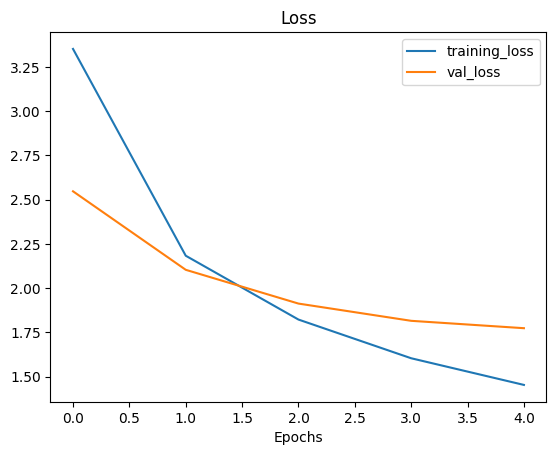

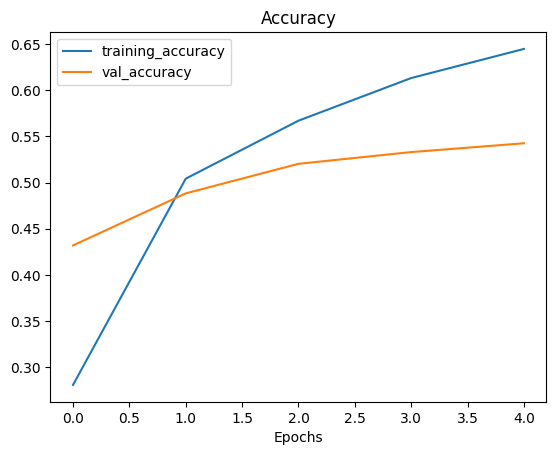

In [ ]:
plot_loss_curves(history_all_classes)

It looks like at the end our model started overfitting

#### Fine tuning our model

In [ ]:
# Unfreezing the last 10 layers to fine tune
base_model.trainable = True

for layer in base_model.layers[:-5]:
  layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_average_pooling True
output_layer True


In [ ]:
# Check which layers are trainable in the base model
for layer_number , layer in enumerate(base_model.layers):
  print(layer_number , layer.name , layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [ ]:
# Fitting our model to fine tune
fine_tune_epochs = 10

history_all_classes_fine_tune = model.fit(train_data_all_10_percent,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)), # validate on 15% of the test data
                                                     initial_epoch=history_all_classes.epoch[-1]) # start from previous last epoch


Epoch 5/10
237/237 [==============================] - 44s 184ms/step - loss: 0.7760 - accuracy: 0.7950 - val_loss: 1.7792 - val_accuracy: 0.5418
Epoch 6/10
237/237 [==============================] - 45s 185ms/step - loss: 0.7494 - accuracy: 0.7979 - val_loss: 1.7536 - val_accuracy: 0.5495
Epoch 7/10
237/237 [==============================] - 41s 171ms/step - loss: 0.7001 - accuracy: 0.8103 - val_loss: 1.8138 - val_accuracy: 0.5318
Epoch 8/10
237/237 [==============================] - 42s 177ms/step - loss: 0.6561 - accuracy: 0.8304 - val_loss: 1.7730 - val_accuracy: 0.5461
Epoch 9/10
237/237 [==============================] - 39s 163ms/step - loss: 0.6281 - accuracy: 0.8351 - val_loss: 1.8157 - val_accuracy: 0.5360
Epoch 10/10
237/237 [==============================] - 42s 175ms/step - loss: 0.5970 - accuracy: 0.8455 - val_loss: 1.8245 - val_accuracy: 0.5347


In [ ]:
results_all_classes_10_percent_fine_tune = model.evaluate(test_data)
results_all_classes_10_percent_fine_tune


790/790 [==============================] - 61s 77ms/step - loss: 1.5367 - accuracy: 0.6002


[1.5367066860198975, 0.6001583933830261]

It seems like our model got a slight boos after fine tuning but let's plot the curves

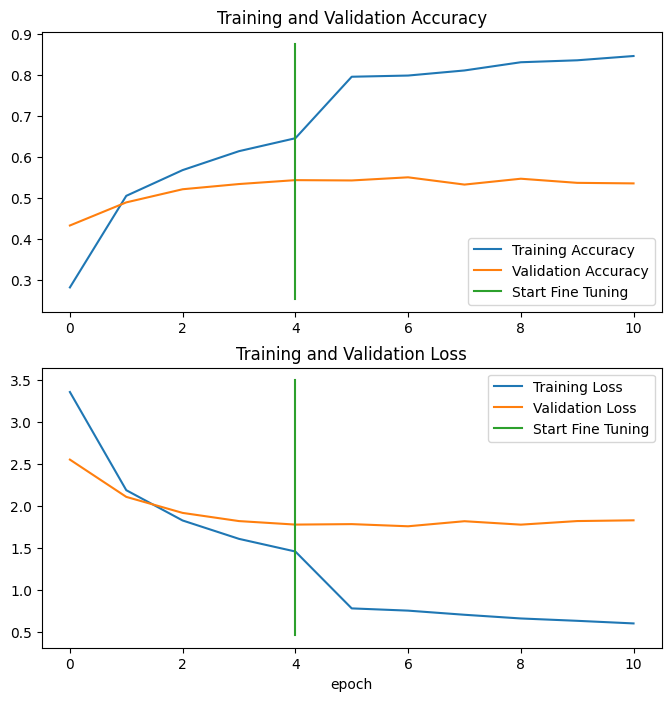

In [ ]:
compare_historys(original_history=history_all_classes,
                 new_history=history_all_classes_fine_tune,
                 initial_epochs=5)

It seems that the model is overfitting so the next experiment we will be using all of the data.

It is okay to overfit when the data the pre trained model was trained on is similar to our data. Fine tuning works best in the case of different data

In [ ]:
# Making prediction with our model
pred_probs = model.predict(test_data , verbose = 1)

790/790 [==============================] - 65s 82ms/step


In [ ]:
# Number of predictions = size of test set
len(pred_probs)

25250

In [ ]:
# The shape of our predictions
pred_probs.shape

(25250, 101)

In [ ]:
import numpy as np
pred_probs[0] , np.argmax(pred_probs[0])

(array([5.41639812e-02, 5.82751760e-04, 7.09211305e-02, 4.48544455e-07,
        2.43671434e-06, 6.87839304e-07, 1.02226237e-04, 1.22849542e-06,
        1.69695914e-02, 2.81218585e-04, 1.96534438e-06, 1.67410872e-05,
        1.84440330e-04, 2.89044692e-07, 2.52749398e-03, 2.77256221e-03,
        1.93218989e-06, 2.19309330e-03, 8.75419658e-03, 1.20022351e-05,
        7.92588515e-04, 4.60085448e-06, 1.31902329e-04, 1.41602268e-05,
        2.58286600e-03, 3.41852219e-03, 1.51763717e-03, 2.06054465e-05,
        2.68348217e-01, 1.42030208e-03, 3.89633016e-07, 8.88610783e-04,
        9.70840920e-05, 2.89647186e-08, 3.23270494e-03, 1.81554769e-05,
        1.71292340e-05, 1.10280083e-03, 2.07124390e-02, 1.01169484e-04,
        9.20365783e-05, 7.36643095e-03, 2.47448304e-04, 8.82355016e-06,
        7.89976330e-05, 8.26064297e-06, 1.35397236e-03, 1.97909729e-04,
        8.11147004e-07, 1.25906572e-01, 4.28140884e-05, 4.77224967e-05,
        1.17388844e-01, 4.32710610e-02, 2.57770807e-05, 7.366686

In [ ]:
# Getting the predicted label of every entry
pred_classes = pred_probs.argmax(axis = 1)
pred_classes[:10]

array([28,  0,  0,  8,  8, 78, 29, 46,  9, 41])

In [ ]:
# Getting the accuracy score using sklearn
from sklearn.metrics import accuracy_score
y_labels = []
for images , labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.6001584158415841

In [ ]:
# The follwoing method is taken from ztm tensorflow course
from helper_functions import make_confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")



In [ ]:
class_names = test_data.class_names
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [ ]:
# Getting the classification report to see some metrics like precision , recall , f1-score , support
from sklearn.metrics import classification_report
print(classification_report(y_labels , pred_classes))

              precision    recall  f1-score   support

           0       0.43      0.16      0.23       250
           1       0.60      0.69      0.64       250
           2       0.77      0.54      0.63       250
           3       0.83      0.47      0.60       250
           4       0.51      0.39      0.44       250
           5       0.44      0.46      0.45       250
           6       0.75      0.76      0.76       250
           7       0.82      0.79      0.80       250
           8       0.21      0.60      0.31       250
           9       0.42      0.66      0.51       250
          10       0.46      0.46      0.46       250
          11       0.88      0.49      0.63       250
          12       0.70      0.61      0.65       250
          13       0.57      0.51      0.54       250
          14       0.74      0.45      0.56       250
          15       0.40      0.36      0.38       250
          16       0.74      0.54      0.63       250
          17       0.32    

A Quick reminder:
* **Precision**-proportion of true positive over total number of samples. Higher precision leads to less false positives

* **Recall**-Proprotion of true positives
over total number of true positives and false negatives. Higher recall leads to less false negatives

* **F1 Score**- Combines precision and recall into one metric 1 is best and 0 is worst

In [ ]:
# Getting the dictionary form of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)

In [ ]:
# Getting the f1 score of each class
class_f1_scores = {}
for k , v in classification_report_dict.items():
  if k == 'accuracy':
    break

  class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.23323615160349856,
 'baby_back_ribs': 0.6407407407407407,
 'baklava': 0.6335697399527186,
 'beef_carpaccio': 0.6020408163265306,
 'beef_tartare': 0.4409090909090909,
 'beet_salad': 0.44961240310077516,
 'beignets': 0.7569721115537849,
 'bibimbap': 0.8024439918533605,
 'bread_pudding': 0.31434599156118137,
 'breakfast_burrito': 0.5123456790123457,
 'bruschetta': 0.46215139442231074,
 'caesar_salad': 0.6323907455012854,
 'cannoli': 0.6509635974304068,
 'caprese_salad': 0.5412262156448204,
 'carrot_cake': 0.5586034912718205,
 'ceviche': 0.37711864406779666,
 'cheese_plate': 0.6267281105990784,
 'cheesecake': 0.4090909090909091,
 'chicken_curry': 0.5113636363636364,
 'chicken_quesadilla': 0.658385093167702,
 'chicken_wings': 0.7167381974248929,
 'chocolate_cake': 0.5559701492537313,
 'chocolate_mousse': 0.38415841584158417,
 'churros': 0.752212389380531,
 'clam_chowder': 0.696,
 'club_sandwich': 0.6836027713625865,
 'crab_cakes': 0.42481203007518803,
 'creme_brulee': 0.7643

In [ ]:
# Creating a pandas dataframe and ordering the values
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

class_name  f1-score
33    edamame  0.960630
63   macarons  0.888412
69    oysters  0.860082
75        pho  0.857143
32  dumplings  0.836066

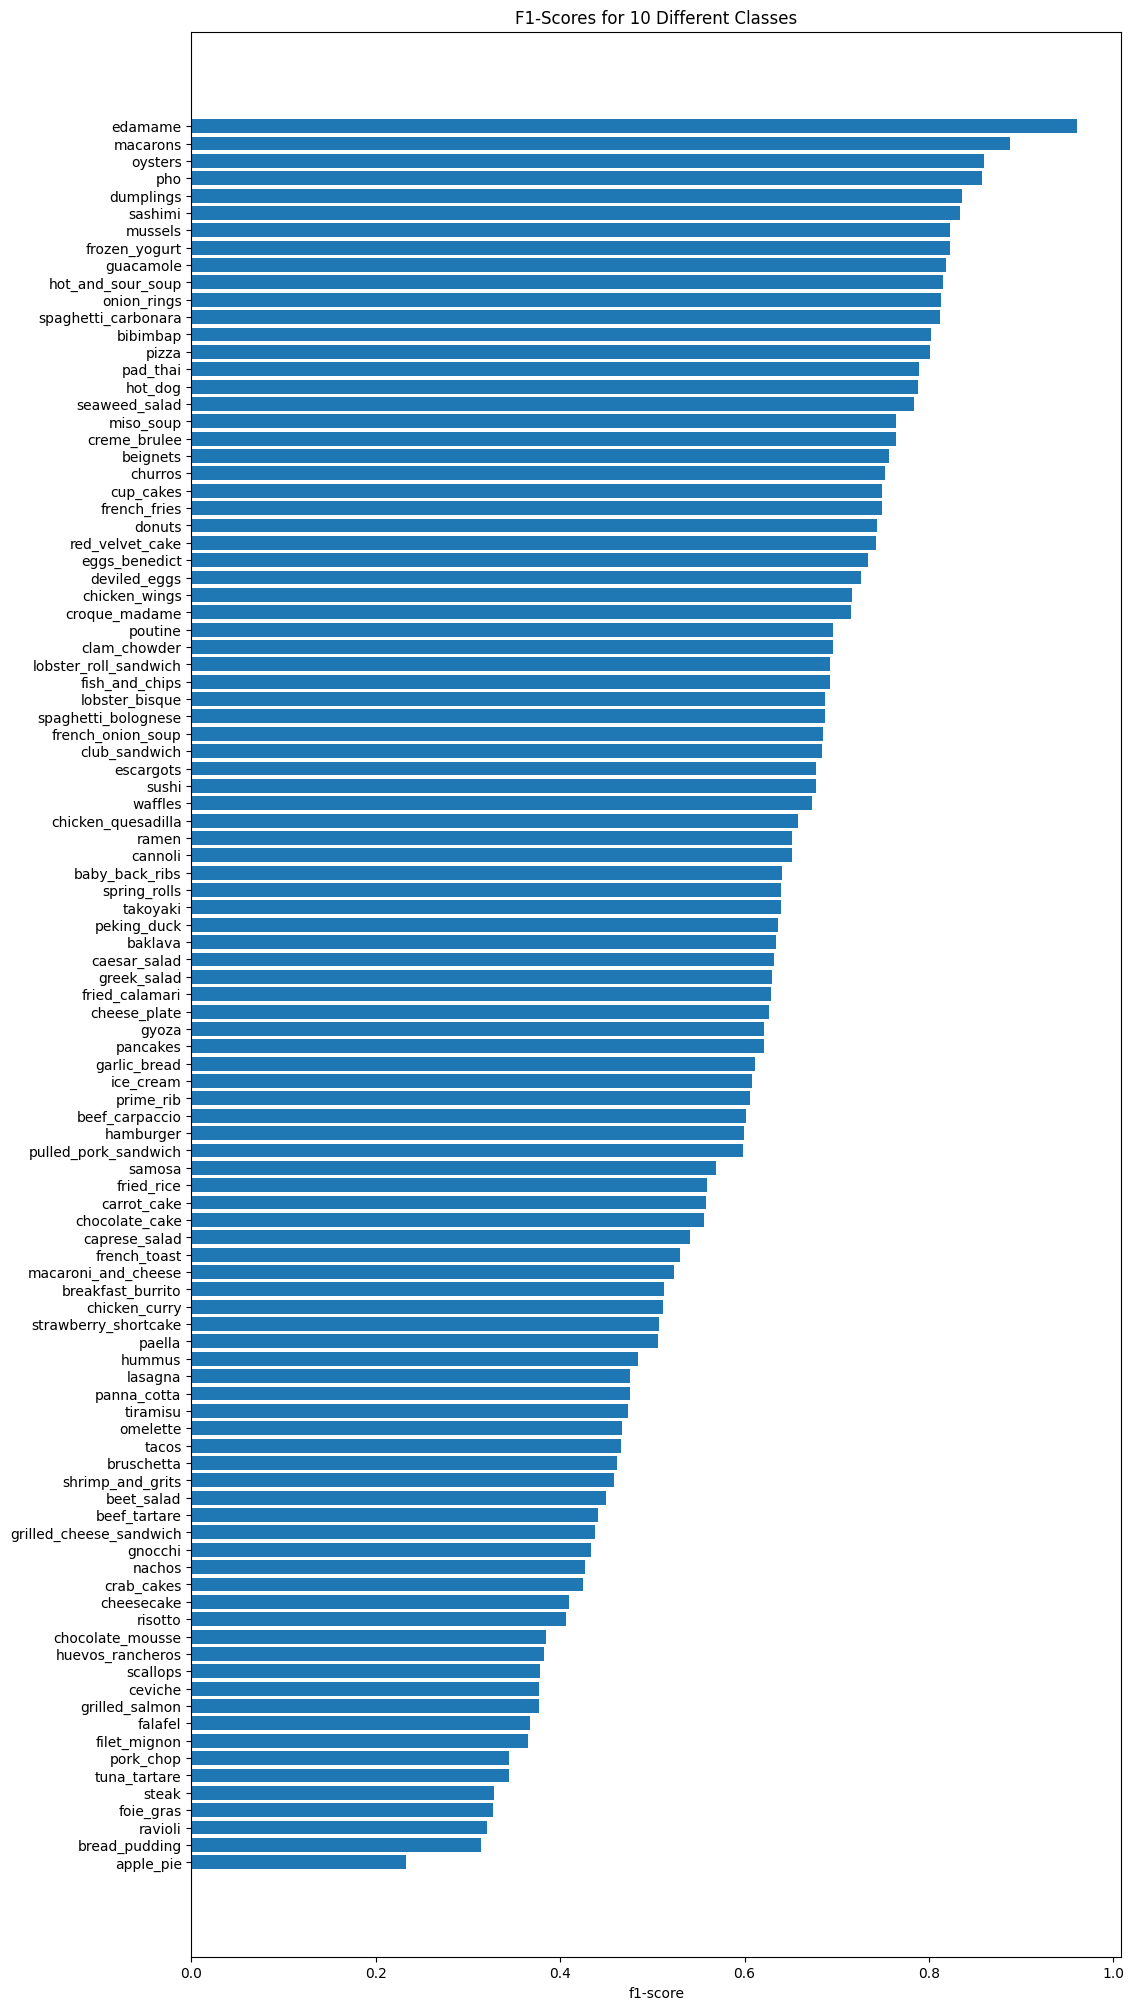

In [ ]:
# Creating a horizontal barchat to easily visualize
fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis();

In [ ]:
# Visualizeing on image
def load_and_prep_image(filename , img_shape = 224 , scale = True):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img , [img_shape , img_shape])
  if scale:
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 58ms/step


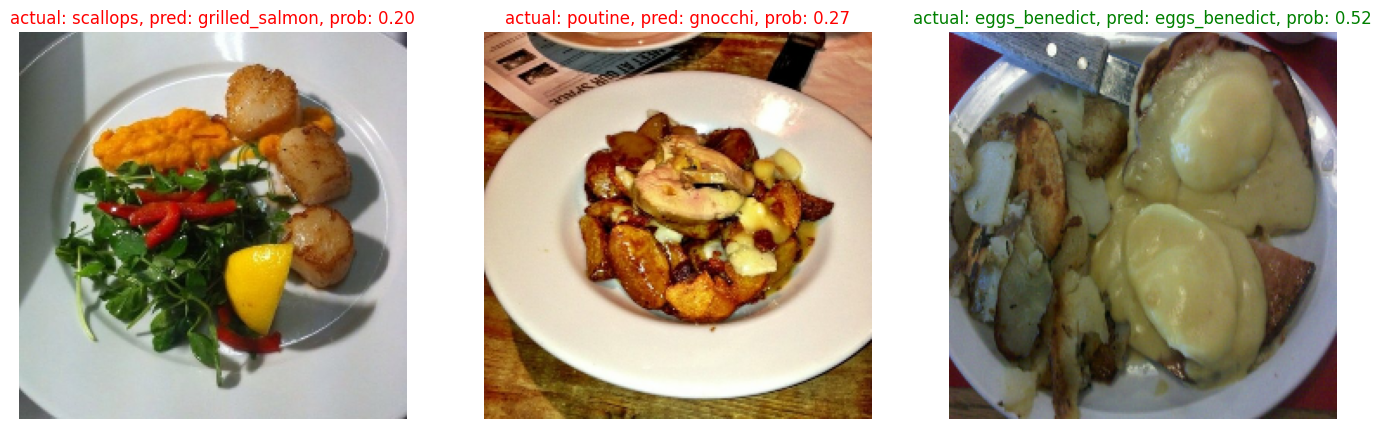

In [ ]:
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename
  img = load_and_prep_image(filepath, scale=False)
  pred_prob = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class:
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

After seeing several examples on each of the predictions it seems that 2 sources of error are:
1. incorrect labels
2. similar food like apple pie and waffles

One extra technique could be to visualize the most wrong predictions which are predictions with the highest probabilities that are wrong

### Grand finale
In this section we will be using 100% of our data to train foodvision

In [8]:
## Check our gpu
import tensorflow as tf
!nvidia-smi -L
print(tf.__version__)

GPU 0: Tesla T4 (UUID: GPU-b4a40f89-c250-5cfa-a404-11d6953d7c09)
2.12.0


To use mixed precision training we need a compute capability higher than 7.0 , T4 has 7.5 so we are good

In [9]:
# Get helper functions file
import os

if not os.path.exists("helper_functions.py"):
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
else:
    print("[INFO] 'helper_functions.py' already exists, skipping download.")

[INFO] 'helper_functions.py' already exists, skipping download.


In [10]:
# Import series of helper functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

In [11]:
## Use tensorflow datasets to get our data
import tensorflow_datasets as tfds

In [12]:
# List all available datasets
datasets_list = tfds.list_builders()
print('food101' in datasets_list)

True


In [13]:
# Load in the data
(train_data , test_data) , ds_info = tfds.load(name = 'food101',
                                               split = ["train" , "validation"],
                                               shuffle_files = True,
                                               as_supervised = True,
                                               with_info = True)

#### Becoming one with our data
data is already converted to tensors as we obtained the data from tensorflow datasets

In [14]:
# Meta data of the dataset
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [15]:
# Getting the class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [16]:
# Take one sample of the train data
train_one_sample = train_data.take(1) # (image_tensor , label)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [17]:
# output info about our training sample
for image, label in train_one_sample:
  print(f"""
      Image shape: {image.shape}
      Image datatype = {image.dtype}
      Label: {label} {class_names[label.numpy()]}
      """)



      Image shape: (512, 384, 3)
      Image datatype = <dtype: 'uint8'>
      Label: 19 chicken_quesadilla
      


In [18]:
# What does our image look like
image

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  7,   7,   5],
        [ 11,  11,   9],
        [ 14,  14,  12]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   5,   3],
        [  8,   8,   6],
        [ 11,  11,   9]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   5,   3],
        [  7,   7,   5],
        [ 10,  10,   8]],

       ...,

       [[ 72,  75,  82],
        [ 55,  58,  65],
        [ 43,  46,  51],
        ...,
        [105, 113, 115],
        [108, 113, 116],
        [135, 140, 143]],

       [[ 75,  80,  86],
        [ 61,  66,  72],
        [ 51,  54,  59],
        ...,
        [102, 107, 110],
        [ 75,  79,  82],
        [111, 115, 118]],

       [[ 94,  99, 105],
        [ 81,  86,  92],
        [ 71,  74,  79],
        ...,
        [151, 156, 15

In [19]:
tf.reduce_min(image) , tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

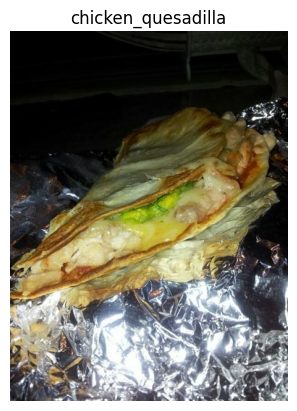

In [20]:
# Plot an image from tensorflow datasets
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

We need to preprocess our data because our data is not batched nor normalized
What we know about our data:
* In `uint8` datatype
* Comprised of all different size tensors
* not scaled

What we know model like:
* Data in float32 and mixed precision
* for batches, tensorflow likes all of the tensors within a batch to be of the same size
* scaled (values between 0 and 1) also called normalized tensor generally perfom better

🔑note: we willnot rescale as efficientnet has rescaling already built in

In [21]:
# Creating our own preprocessing function to preprocess our data (batch , normalize)
def preprocess_img(image , label , img_shape = 224):
  image = tf.image.resize(image , [img_shape , img_shape])
  return tf.cast(image , tf.float32) , label

In [22]:
# Preprocess a single sample and check the output
preprocessed_img = preprocess_img(image , label)[0]
image[:2] , image.shape , image.dtype

(<tf.Tensor: shape=(2, 384, 3), dtype=uint8, numpy=
 array([[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 7,  7,  5],
         [11, 11,  9],
         [14, 14, 12]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 5,  5,  3],
         [ 8,  8,  6],
         [11, 11,  9]]], dtype=uint8)>,
 TensorShape([512, 384, 3]),
 tf.uint8)

In [23]:
preprocessed_img[:2] , preprocessed_img.shape , preprocessed_img.dtype

(<tf.Tensor: shape=(2, 224, 3), dtype=float32, numpy=
 array([[[ 0.       ,  0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       ],
         ...,
         [ 7.7907934,  7.7907934,  5.7907934],
         [ 5.714286 ,  5.714286 ,  3.7142856],
         [10.999987 , 10.999987 ,  8.999987 ]],
 
        [[ 0.       ,  0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       ],
         ...,
         [ 6.770399 ,  6.770399 ,  4.770399 ],
         [ 6.790833 ,  6.790833 ,  4.790833 ],
         [10.1887665, 10.1887665,  8.1887665]]], dtype=float32)>,
 TensorShape([224, 224, 3]),
 tf.float32)

#### Batching and preparing our datasets for our model
We are now creating a data input pipeline

In [24]:
# Map preprocessing function to training and parallelize it
train_data = train_data.map(map_func = preprocess_img ,
                            num_parallel_calls = tf.data.AUTOTUNE # Utalize all the compute power you can use
                            )
# Shuffle train data and turn it into batches
train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

# Using the same for our test data
test_data = test_data.map(map_func = preprocess_img ,
                            num_parallel_calls = tf.data.AUTOTUNE # Utalize all the compute power you can use
                            ).batch(32).prefetch(tf.data.AUTOTUNE).cache()

In [25]:
train_data , test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <CacheDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [26]:
# create tensorboard callback
from helper_functions import create_tensorboard_callback

# Create modelcheckpoint callback
checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = "val_loss",
                                                      save_best_only=True,
                                                      save_weights_only = True,
                                                      verbose = 0)

In [27]:
# Creating our model
import tensorflow as tf

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3) , name = 'input_layer')
x = base_model(inputs , training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(101 , activation = 'softmax' , dtype = tf.float32 , name = 'softmax_float32')(x)
model = tf.keras.Model(inputs , outputs)

In [28]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 softmax_float32 (Dense)     (None, 101)               129381    
                                                                 
Total params: 6,048,693
Trainable params: 129,381
Non-trainable params: 5,919,312
_________________________________________________________________


In [30]:
# Training and evaluating
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs = 5,
                                                     steps_per_epoch = len(train_data),
                                                     validation_data = test_data,
                                                     validation_steps = int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs",
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20230818-183459
Epoch 1/5
2368/2368 [==============================] - 245s 94ms/step - loss: 1.7454 - accuracy: 0.5789 - val_loss: 1.1487 - val_accuracy: 0.7002
Epoch 2/5
2368/2368 [==============================] - 237s 98ms/step - loss: 1.2106 - accuracy: 0.6877 - val_loss: 1.0416 - val_accuracy: 0.7190
Epoch 3/5
2368/2368 [==============================] - 198s 82ms/step - loss: 1.0636 - accuracy: 0.7218 - val_loss: 0.9917 - val_accuracy: 0.7323
Epoch 4/5
2368/2368 [==============================] - 205s 85ms/step - loss: 0.9677 - accuracy: 0.7455 - val_loss: 0.9735 - val_accuracy: 0.7399
Epoch 5/5
2368/2368 [==============================] - 205s 84ms/step - loss: 0.8973 - accuracy: 0.7641 - val_loss: 0.9650 - val_accuracy: 0.7442


This was food vision, where we where able to get ~74% accuracy on 101 food classes. We have beaten our baseline with more than 20% accuracy.

Things that can be done to improve our model if needed:
1. Fine tune
2. Train for a couple more epochs
3. use more complex model

However due to that google colab kept crashing because of the memory usage , we will stop at 74%